In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_rows = None

In [3]:
# Load preprocessed data

loan_data_preprocessed_backup = pd.read_pickle('loan_data_2007_2014_preprocessed.pkl')


In [4]:
# Sanity check
loan_data_preprocessed_backup.shape

(466285, 208)

In [5]:
# Sanity check
loan_data_preprocessed_backup.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,1,0,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,1,0,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,1,0,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,1,0,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,1,0,1


In [6]:
# Sanity check

loan_data_preprocessed_backup.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [7]:
# Make a copy and work on the copy. A good habit in ML

loan_data_preprocessed = loan_data_preprocessed_backup.copy()


In [8]:
# Sanity check
loan_data_preprocessed.shape

(466285, 208)

# LGD and EAD models

These models should be build only on accounts have been written off.



In [9]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

From the list above, we will use the following 2 values to identify defaulted loans

'Charged Off'

'Does not meet the credit policy. Status:Charged Off'



In [10]:
# Load accounts  that have been written off into a dataframe

loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]


In [11]:
# check
loan_data_defaults.shape

(43236, 208)

In [12]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

There are missing values in several variables but we are going to use the following variables having missing values

mths_since_last_delinq                                             23950
mths_since_last_record                                             37821


Note: when we used these variables for PD model we used a dummy variable because with a PD model we have to build a model that can be easily understood.

With EAD and LGD models we are not restricted to dummy variables.

Therefore, we can impute the missing values

In [13]:
# Filling missing values with 0. This is a conservative approach
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/3932450394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/3932450394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


# Dependent variable for LGD model (recovery_rate)

LGD stands for loss given default

It is the % of the total exposure (total loan) that cannot be recovered once a default has occured

In practice, % of total loan (total exposure) that can be recovered is compute. This is called recovery rate

recovery_rate = recoveries / total_funded_amt

Therefore LGD = 1 - recovery_rate

In [14]:
# Compute recovery_rate

loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/1704475752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [15]:
# Sanity check

loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [16]:
# Check how many samples have a recovery rate > 1. This seems to be a data issue
loan_data_defaults[loan_data_defaults['recovery_rate'] > 1].shape

(27, 209)

Since the number of samples with recovery_rate > 1 is only 27. I will just set the recovery_rate > 1 to 1.

In [17]:
# Set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/1083912664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/1083912664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [18]:
# Sanity check
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

# Dependent variable for EAD model (credit_conversion_factor)

EAD stands for exposure at default

It is the maximum value a lender will loose when a default occurs.

For home loan for example, a borrower would have generally paid back some of the principal before the default occurs.

The % that is unpaid is often called "credit conversion factor".

# EAD = total_funded_amt * credit_conversion_factor

credit_conversion_factor will be our depedent variable for EAD model

## Formula for credit_coversion_factor = (funded_amount - total_recovered_principal)/ funded_amount

In [19]:
# Compute dependent variable for the EAD model: credit conversion factor

# credit conversion factor is ratio of the difference of the total funded amount and princial repaid over total funcded amount

loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/385892119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [20]:
#sanity check
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [21]:
# Save the data to a pickle file

#loan_data_defaults.to_pickle('loan_data_defaults.pickle')

# Exploration of dependent variables for LGD and EAD models


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

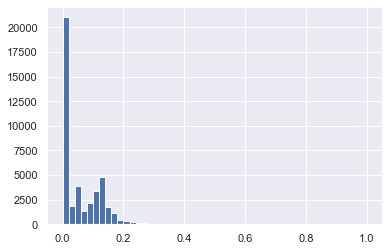

In [23]:
# Histogram with 50 bins
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

As seen above more than half of the values have a recovery_rate of 0.

So we can break this into 2 models.

1. Logistic regression model to predict if recovery_rate is 0 or not.

2. Linear regression model to predict the value of recover_rate if logistic regression predicts that recovery_rate is not 0.


In [24]:
# create another column having 0 if recovery_rate is 0 and 1 otherwise.
# This will be the target of the logistic regression model described above

loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


/var/folders/mq/bp9wv7ld1bscd9fvvns2ftkh0000gn/T/ipykernel_46276/3492863380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


In [25]:
# sanity check
loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1].count()

Unnamed: 0                                                         24371
id                                                                 24371
member_id                                                          24371
loan_amnt                                                          24371
funded_amnt                                                        24371
funded_amnt_inv                                                    24371
term                                                               24371
int_rate                                                           24371
installment                                                        24371
grade                                                              24371
sub_grade                                                          24371
emp_title                                                          22638
emp_length                                                         23303
home_ownership                                     

In [26]:
loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 0].count()

Unnamed: 0                                                         18865
id                                                                 18865
member_id                                                          18865
loan_amnt                                                          18865
funded_amnt                                                        18865
funded_amnt_inv                                                    18865
term                                                               18865
int_rate                                                           18865
installment                                                        18865
grade                                                              18865
sub_grade                                                          18865
emp_title                                                          17311
emp_length                                                         17596
home_ownership                                     

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

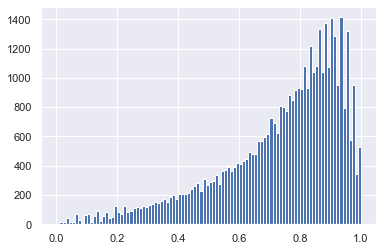

In [27]:
# Plot credit conversion factor into 50 bins

plt.hist(loan_data_defaults['CCF'], bins = 100)

We will use a linear regression model to predict credit conversion factor directly.


# LGD Model



## Splitting into train and test sets

In [28]:
from sklearn.model_selection import train_test_split

## LGD Model stage 1 - Logistic regression to predict recovery_rate 0 or 1.

if recovery_rate = 0 then we are done

else

if recovery rate !=0 then go to stage 2 model


In [29]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.

lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)


In [30]:
# Sanity check

print (lgd_inputs_stage_1_train.shape)
print (lgd_inputs_stage_1_test.shape)
print (lgd_targets_stage_1_train.shape)
print (lgd_targets_stage_1_test.shape)

(34588, 207)
(8648, 207)
(34588,)
(8648,)


## Keep only required features for stage 1 model

In [31]:
# List containing all independent variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [32]:
# List contianing reference variables
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [33]:
# Remove other variables

lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [34]:
# Remove reference variables like we did before

lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)




In [35]:
# Sanity check
# Check for missing values. 
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

# Model training

We will extend the logistic regression model frm sklearn to compute p-values (same as before)



In [36]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [37]:
# Object of extended LogisticRegression_with_p_values class
reg_lgd_st_1 = LogisticRegression_with_p_values()

# Fit data into model
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/Users/adityanarvekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# get all feature names into a list
feature_name = lgd_inputs_stage_1_train.columns.values


In [39]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)

summary_table

,Feature name,Coefficients
0,grade:A,-1.553732e-05
1,grade:B,-8.741288e-05
2,grade:C,-1.628449e-04
3,grade:D,1.937804e-05
4,grade:E,1.637689e-05
5,grade:F,8.769944e-05
6,home_ownership:MORTGAGE,-4.194156e-05
7,home_ownership:NONE,1.063947e-06
8,home_ownership:OTHER,5.048722e-07
9,home_ownership:OWN,-6.129419e-06


In [40]:
# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1
# Put the value of intercept  in the row having index = 0
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# sort by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.281274e-04
1,grade:A,-1.553732e-05
2,grade:B,-8.741288e-05
3,grade:C,-1.628449e-04
4,grade:D,1.937804e-05
5,grade:E,1.637689e-05
6,grade:F,8.769944e-05
7,home_ownership:MORTGAGE,-4.194156e-05
8,home_ownership:NONE,1.063947e-06
9,home_ownership:OTHER,5.048722e-07


In [41]:
# get p_values from model 

p_values = reg_lgd_st_1.p_values

# add nan corresponding to intercept in this array

p_values = np.append(np.nan,np.array(p_values))

# put p_values into summary table

summary_table['p_values'] = p_values

summary_table


,Feature name,Coefficients,p_values
0,Intercept,-1.281274e-04,NaN
1,grade:A,-1.553732e-05,9.998521e-01
2,grade:B,-8.741288e-05,9.989722e-01
3,grade:C,-1.628449e-04,9.980198e-01
4,grade:D,1.937804e-05,9.997739e-01
5,grade:E,1.637689e-05,9.998268e-01
6,grade:F,8.769944e-05,9.991928e-01
7,home_ownership:MORTGAGE,-4.194156e-05,9.986756e-01
8,home_ownership:NONE,1.063947e-06,9.999989e-01
9,home_ownership:OTHER,5.048722e-07,9.999990e-01


The interpretation of the coefficients remain the same as that of the logistic regression model we built for PD.

The only difference here is the presence of contionous variables

for example for int_rate, the coeffieint represents the change in log odds for a unit change in int_rate

int_rate	1.440027e-04


For a unit change in int_rate, the log of the odds of recovery_rate being greater than 0 will increase by 0.0001440027.



# Testing the LGD model



In [42]:
# Keep only features used to train the model
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [43]:
# Remove dummy variables from test set

lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)


In [44]:
# predict the  dependent variable (targets)

y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)


In [45]:
# sanity checks

print (y_hat_test_lgd_stage_1.shape)

print (y_hat_test_lgd_stage_1)

(8648,)
[1 1 0 ... 1 1 1]


In [46]:
# predict probability instead of just the class

y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)


In [47]:
# This is a 2D array where each row sums to 1
# The first value in each row = Prob(recovery_rate = 0)
# The second value in each row = Prob (recovery_rate > 0)
y_hat_test_proba_lgd_stage_1

array([[0.41531327, 0.58468673],
       [0.38994907, 0.61005093],
       [0.51764919, 0.48235081],
       ...,
       [0.4664477 , 0.5335523 ],
       [0.42111702, 0.57888298],
       [0.47672647, 0.52327353]])

In [48]:
# Put Prob (recovery_rate > 0) into a seperate variable

y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [49]:
y_hat_test_proba_lgd_stage_1

array([0.58468673, 0.61005093, 0.48235081, ..., 0.5335523 , 0.57888298,
       0.52327353])

In [50]:
# create a new dataframe with all test samples
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test
# Reset index
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [51]:
# concate 2 data frames
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)


In [52]:
# Name columns of new dataframe
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [53]:
# Sets index to be same as index of lgd_inputs_stage_1_test

df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index


In [54]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.584687
69814,1,0.610051
101396,0,0.482351
463268,1,0.556271
253729,0,0.401044


In [55]:
# sanity check
df_actual_predicted_probs.shape

(8648, 2)

# Check performace of model


In [56]:
# Set threshold
tr = 0.5
# Compute predictions
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [57]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,1020,2742
1,664,4222


In [58]:
# Divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.117946,0.317068
1,0.076781,0.488205


In [59]:
# Compute accuracy
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.6061517113783533

The model is nothing great.

We know that tr=0.5 is arbitrary and may not be the optimal threshold.

As we have done with PD model, we will now use ROC graph and AUCROC



In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

In [61]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# we store each of the three arrays in a separate variable.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])


Text(0.5, 1.0, 'ROC curve')

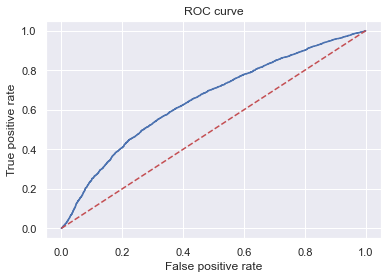

In [62]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [63]:
# Compute AUCROC

AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

AUROC

0.6511141424804522

In [64]:
# Find best threshold
optimal_rate = tpr - fpr 
optimal_idx = np.argmax(optimal_rate)
best_thresh = thresholds[optimal_idx]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.578527


In [65]:
#Check the confusion matrix with the best threshold

tr=0.578527
# if predicted prob > 0.88597 then predict 1 else predict 0
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])



Predicted,0,1
Actual,,
0,2565,1197
1,2184,2702


In [66]:
# Compute accuract
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.6090425531914894

In [67]:
# Manual check
print ("accuracy = ", (2565+2702)/df_actual_predicted_probs.shape[0])

accuracy =  0.6090425531914894


## Save the stage 1 model 

So we can load it into any notebook we use to build stage 2 model



In [68]:
import pickle



In [69]:
# Save stage 1 model 


#pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

# Stage 2 model - Linear regression

We will use this model on samples where stage 1 model predicts recovery_rate to be greater than 0.


In [70]:
# Keep on samples where recovery_rate = 1

lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]



In [71]:
# 80-20 train test split with random_state = 42 

lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)


In [72]:
# sanity check

print (lgd_inputs_stage_2_train.shape)

print (lgd_inputs_stage_2_test.shape)

print (lgd_targets_stage_2_train.shape)

print (lgd_targets_stage_2_test.shape)

(19496, 207)
(4875, 207)
(19496,)
(4875,)


In [73]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# Keep only the feature we are going to use to train model

lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

# Remove dummy variable

lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)


In [75]:
# Create linear regression model object
reg_lgd_st_2 = linear_model.LinearRegression()

# fit data into the model
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)


LinearRegression()

In [76]:
# Stores the names of the columns of a dataframe in a variable.

feature_name = lgd_inputs_stage_2_train.columns.values

In [77]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)



In [78]:
# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1

# Assigns values of intercept to the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]

# Sort dataframe by index

summary_table = summary_table.sort_index()


summary_table

,Feature name,Coefficients
0,Intercept,2.406858e-01
1,grade:A,-6.826892e-02
2,grade:B,-5.083556e-02
3,grade:C,-3.748066e-02
4,grade:D,-2.717310e-02
5,grade:E,-1.315941e-02
6,grade:F,-5.260168e-03
7,home_ownership:MORTGAGE,2.832212e-03
8,home_ownership:NONE,1.459035e-01
9,home_ownership:OTHER,-9.475922e-03


In stage 2 model, the coefficients represent the amount of change in the dependent variable i.e recovery_rate givven a unit change in the independent variable

For example,

if dti income increases by 1 unit then dependent variable (recovery_rate) increases by 0.0001775655

if funded_amnt increases by 1 unit then dependent variable (recovery_rate) decreases by -0.0000002186999e-07


# Stage 2 model evaluation

In [79]:
#  Keep only the variables we need for the model.

lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]


In [80]:
# Remove the dummy variable reference categories.

lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)


In [81]:
# Use trained model to predict

y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)


In [82]:
# Sanity check

y_hat_test_lgd_stage_2.shape

(4875,)

In [83]:
# Create copy of dataframe containing test targets and reset its index
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test
lgd_targets_stage_2_test_temp.reset_index(drop=True, inplace=True)
lgd_targets_stage_2_test_temp

0       0.033254
1       0.156128
2       0.181260
3       0.035356
4       0.046756
5       0.079739
6       0.757192
7       0.041769
8       0.005714
9       0.071718
10      0.094896
11      0.040153
12      0.098763
13      0.151849
14      0.126205
15      0.213806
16      0.120049
17      0.150186
18      0.055322
19      0.040871
20      0.038857
21      0.138790
22      0.032147
23      0.133959
24      0.027860
25      0.100477
26      0.134985
27      0.156423
28      0.144999
29      0.024790
30      0.127864
31      1.000000
32      0.123188
33      0.022863
34      0.062732
35      0.373042
36      0.004667
37      0.140345
38      0.000559
39      0.039352
40      0.117206
41      0.001405
42      0.118568
43      0.117022
44      0.135779
45      0.104898
46      0.125185
47      0.088689
48      0.045665
49      0.102585
50      0.096183
51      0.111286
52      0.046893
53      0.111321
54      0.112277
55      0.071961
56      0.001545
57      0.127011
58      0.1206

In [84]:
# Concatenate the 2 dataframes
df = pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1)
# compute correlation

df.corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


The correlation between actual recovery_rate and predicted recovery_rate is 0.307 which is a weak to moderate correlation.

This is a good thing because if the correlation between actual and predicted is too high then its a cause for concern

/Users/adityanarvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recovery_rate', ylabel='Density'>

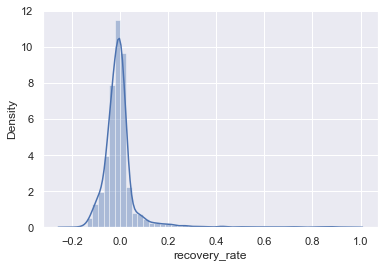

In [85]:
# Check residuals
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


The residuals are normally distributed around mean of 0.0

This means that the errors are not correlated or systematic.



In [86]:
# Save stage 2 model

#pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

# Combining stage 1 and stage 2 to create final LGD model

In [87]:
# predict on all test samples using stage 2 model

y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [88]:
# check
y_hat_test_lgd_stage_2_all.shape

(8648,)

We use stage 2 prediction for samples for which stage 1 predicts 1 i.e recovery_rate > 1

If stage 1 predicts 0 i.e recovery_rate = 0 then we can ignore the prediction of stage 2 model



In [89]:
# multiply predictions of stage 1 and stage 2 element
# when stage 1 predicts 0 the final output will 0 * (stage 2 prediction) = 0


y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all


In [90]:
# check
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.086811
std,0.049732
min,-0.007634
25%,0.064323
50%,0.100930
75%,0.122961
max,0.236973


In [91]:
# The min value is less than 0 so replace it with 0
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)


# EAD Model



In [92]:
# Data for EAD model. 
# Drop 'good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF' 
# 'CCF' is the target

ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)


In [93]:
#check

ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [94]:
# Filter out the variables that wont be used by the model

ead_inputs_train = ead_inputs_train[features_all]

In [95]:
# Remove the reference category variables
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)


In [96]:
# Fit mode

reg_ead = linear_model.LinearRegression()

reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [97]:
# get feature names into a list
feature_name = ead_inputs_train.columns.values

In [98]:
# Build summary table for EAD model. Code is same as before the code used for lgd model

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

summary_table['Coefficients'] = np.transpose(reg_ead.coef_)




In [99]:
summary_table

,Feature name,Coefficients
0,grade:A,-3.030033e-01
1,grade:B,-2.364277e-01
2,grade:C,-1.720232e-01
3,grade:D,-1.198470e-01
4,grade:E,-6.768713e-02
5,grade:F,-2.045907e-02
6,home_ownership:MORTGAGE,-6.343341e-03
7,home_ownership:NONE,-5.539064e-03
8,home_ownership:OTHER,-2.426052e-03
9,home_ownership:OWN,-1.619582e-03


In [100]:
# Add intercept and reset indexes 
summary_table.index = summary_table.index + 1

summary_table.loc[0] = ['Intercept', reg_ead.intercept_]

summary_table = summary_table.sort_index()


In [101]:
# Check
summary_table

,Feature name,Coefficients
0,Intercept,1.109746e+00
1,grade:A,-3.030033e-01
2,grade:B,-2.364277e-01
3,grade:C,-1.720232e-01
4,grade:D,-1.198470e-01
5,grade:E,-6.768713e-02
6,grade:F,-2.045907e-02
7,home_ownership:MORTGAGE,-6.343341e-03
8,home_ownership:NONE,-5.539064e-03
9,home_ownership:OTHER,-2.426052e-03


## Interpretation of the co-efficients

A postive coefficient implies an increase in the Credit conversion factor (CCF)

A negative coefficient implies a decrease in the credit conversion factor (CCF)

Remember, credit conversion factor is the % of the loan that is still outstanding when the borrower defaults.

Therefore, higher CCF implies higher risk while a lower CCF implies lower risk.


A borrower with grade:A has a 30% lower CCF as compared to a borrower having grade:G which is the reference category for grade).

For contionous features, such as int_rate for a unit increase in int_rate, the CCF will decrease by 1.17%.




## Model testing


In [103]:
# remove features not used to train the model
ead_inputs_test = ead_inputs_test[features_all]

In [106]:
# check
features_reference_cat

['grade:G',
 'home_ownership:RENT',
 'verification_status:Verified',
 'purpose:credit_card',
 'initial_list_status:f']

In [107]:
#check
ead_inputs_test.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:f',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'o

In [108]:
# remove categorical features for discrete features
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)


In [109]:
# check
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [110]:
# Predict
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [111]:
# Create a new variable containing test samples

ead_targets_test_temp = ead_targets_test

# reset index of new dataframe

ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [112]:
# Compute coorelation between the actual and predicted values

pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()


,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


0.53 is a moderately strong correlation which is a good thing.

If actual values and predicted values were too strongly coorelated then the model is likely to be wrong.



/Users/adityanarvekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCF', ylabel='Density'>

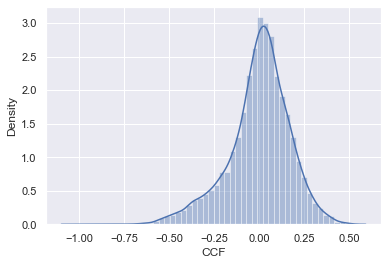

In [113]:
# Check distirbution of residuals

sns.distplot(ead_targets_test - y_hat_test_ead)


The residuals are distributed symmetrically and are symmetric around a mean of 0 which is a good thing.


In [114]:
pd.DataFrame(y_hat_test_ead).describe()


,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088


The max value is 1.16. CCF cannot be greater than 1 and yet we are getting 1.16 because linear regression model is not restricted to 1. We can manually set all values greater than 1 to 1 and all values less 0 to 1.

Note: CCF lies in between 0 and 1 but our linear regression model is not restricted.

In [115]:
# set predicted values > 1 to 1

y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [116]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735992
std,0.105127
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.000000


In [119]:
# Save the EAD model

#pickle.dump(reg_ead, open('ead_model_.sav', 'wb'))